<a href="https://colab.research.google.com/github/dlguswn3659/2020_Image_Lab/blob/master/hair_removal/hair_removal3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [16]:
!pip install -q pydicom

In [17]:
from PIL import Image
import cv2
import os
import pandas as pd
import matplotlib.pyplot as plt
import pydicom
import matplotlib.pyplot as plt
from pydicom.data import get_testdata_files

In [18]:
from google.colab.patches import cv2_imshow

!curl -o logo.png https://colab.research.google.com/img/colab_favicon_256px.png
import cv2

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5500  100  5500    0     0    97k      0 --:--:-- --:--:-- --:--:--   97k


In [19]:
pip install -q tensorflow-io

In [20]:
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf
import tensorflow_io as tfio

original image


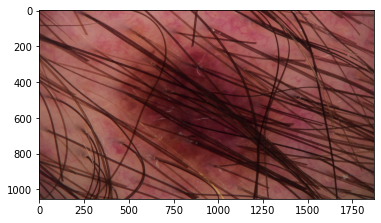

(1053, 1872, 3)
GrayScaled Image


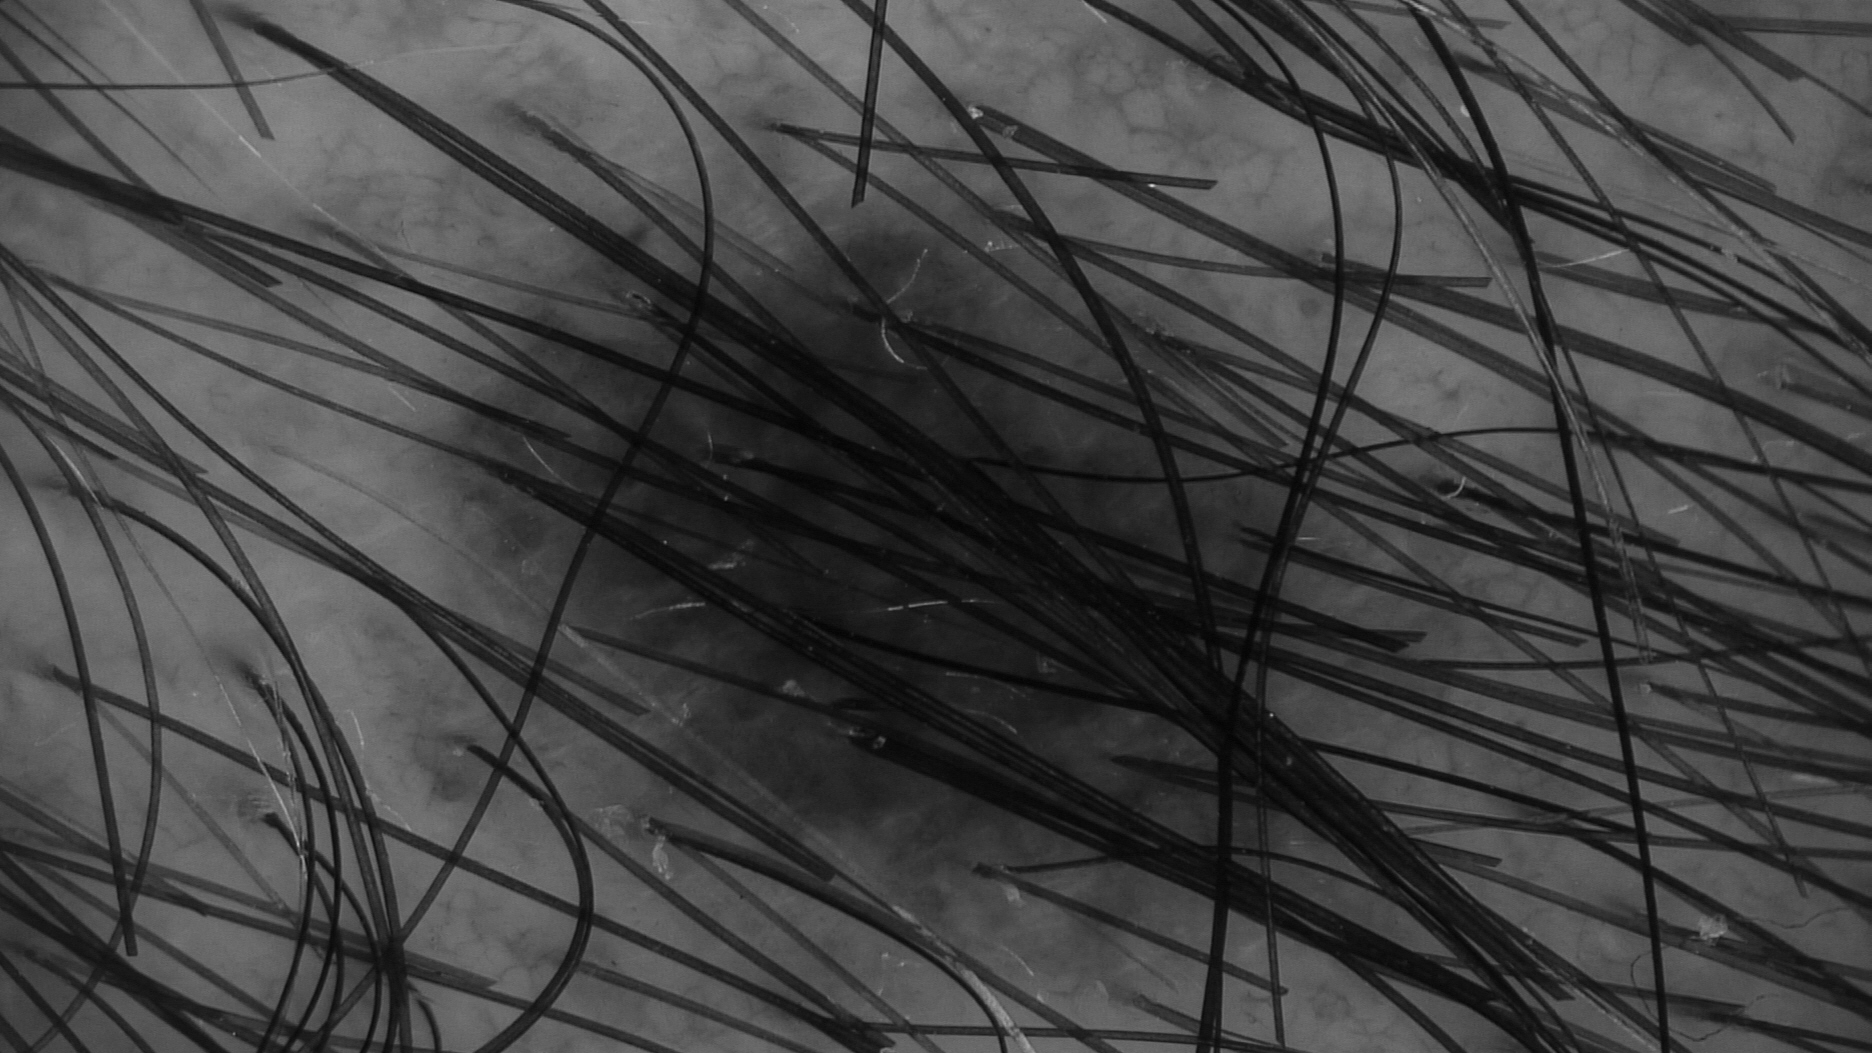

BlackHat filtering result


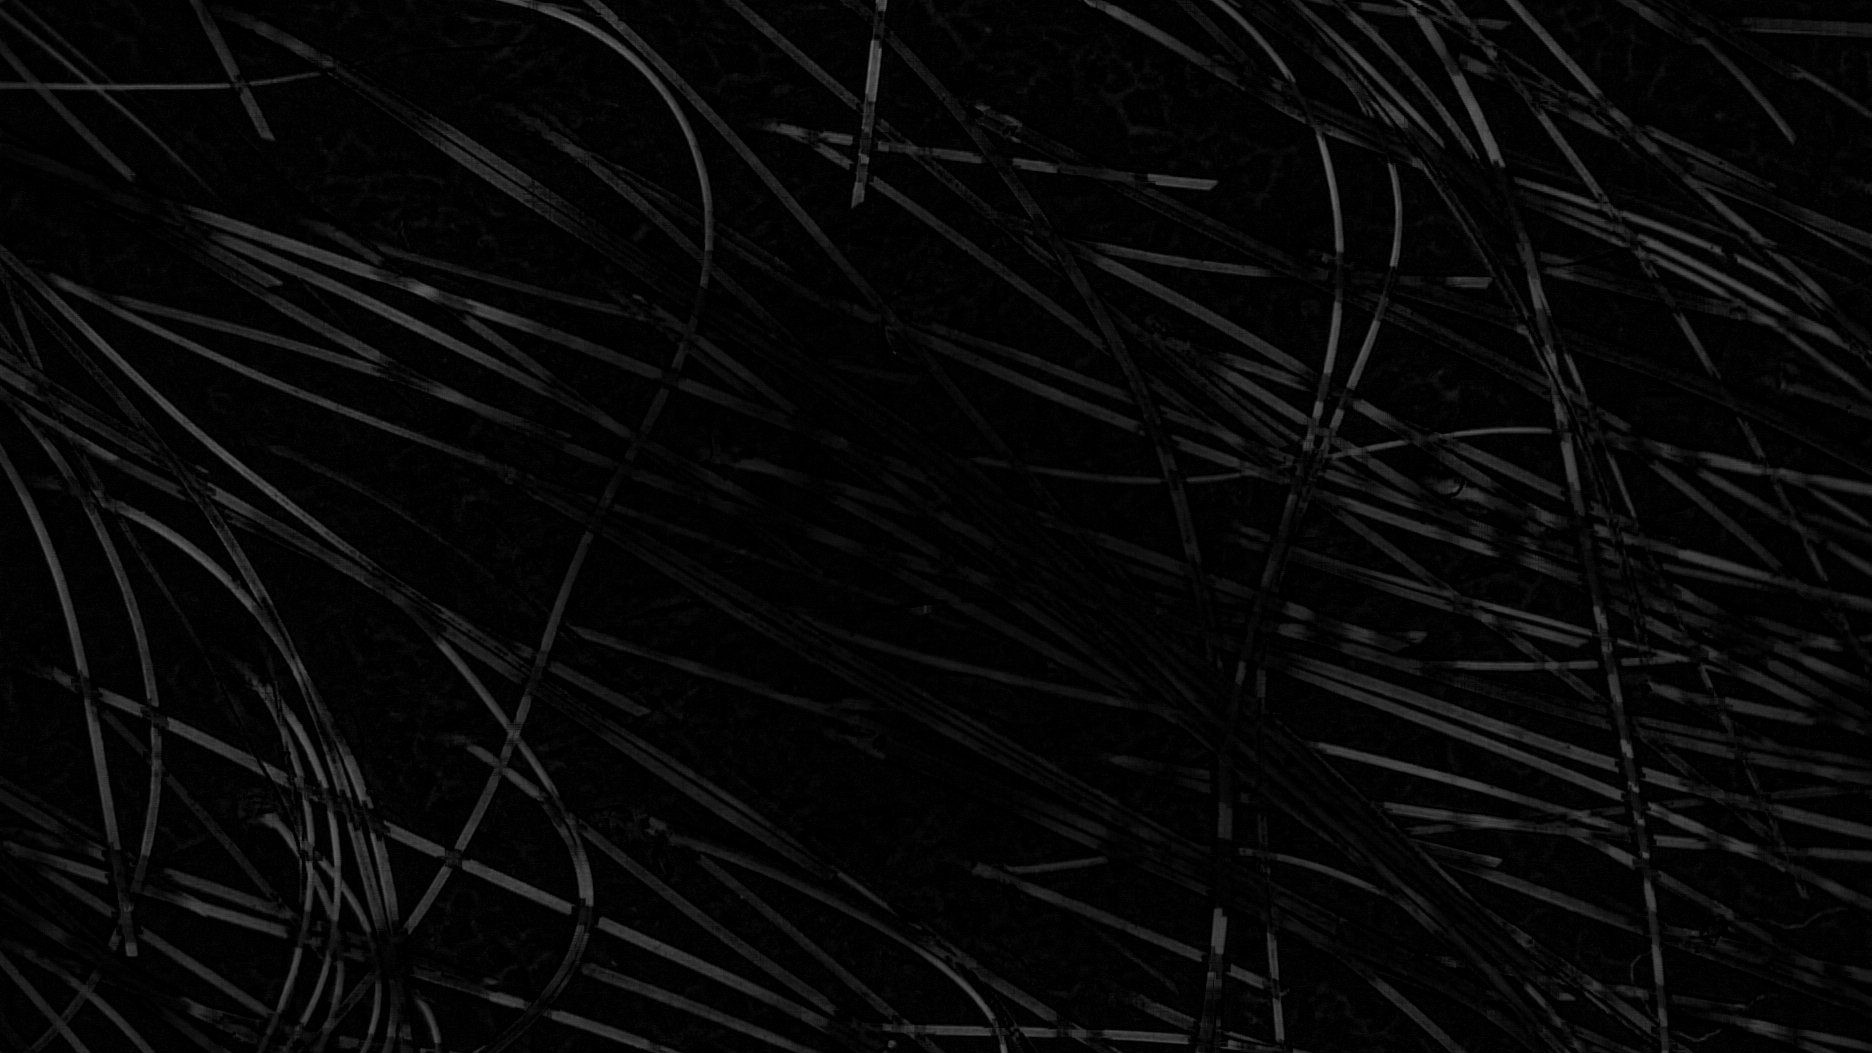

Thresholded image for inpainting


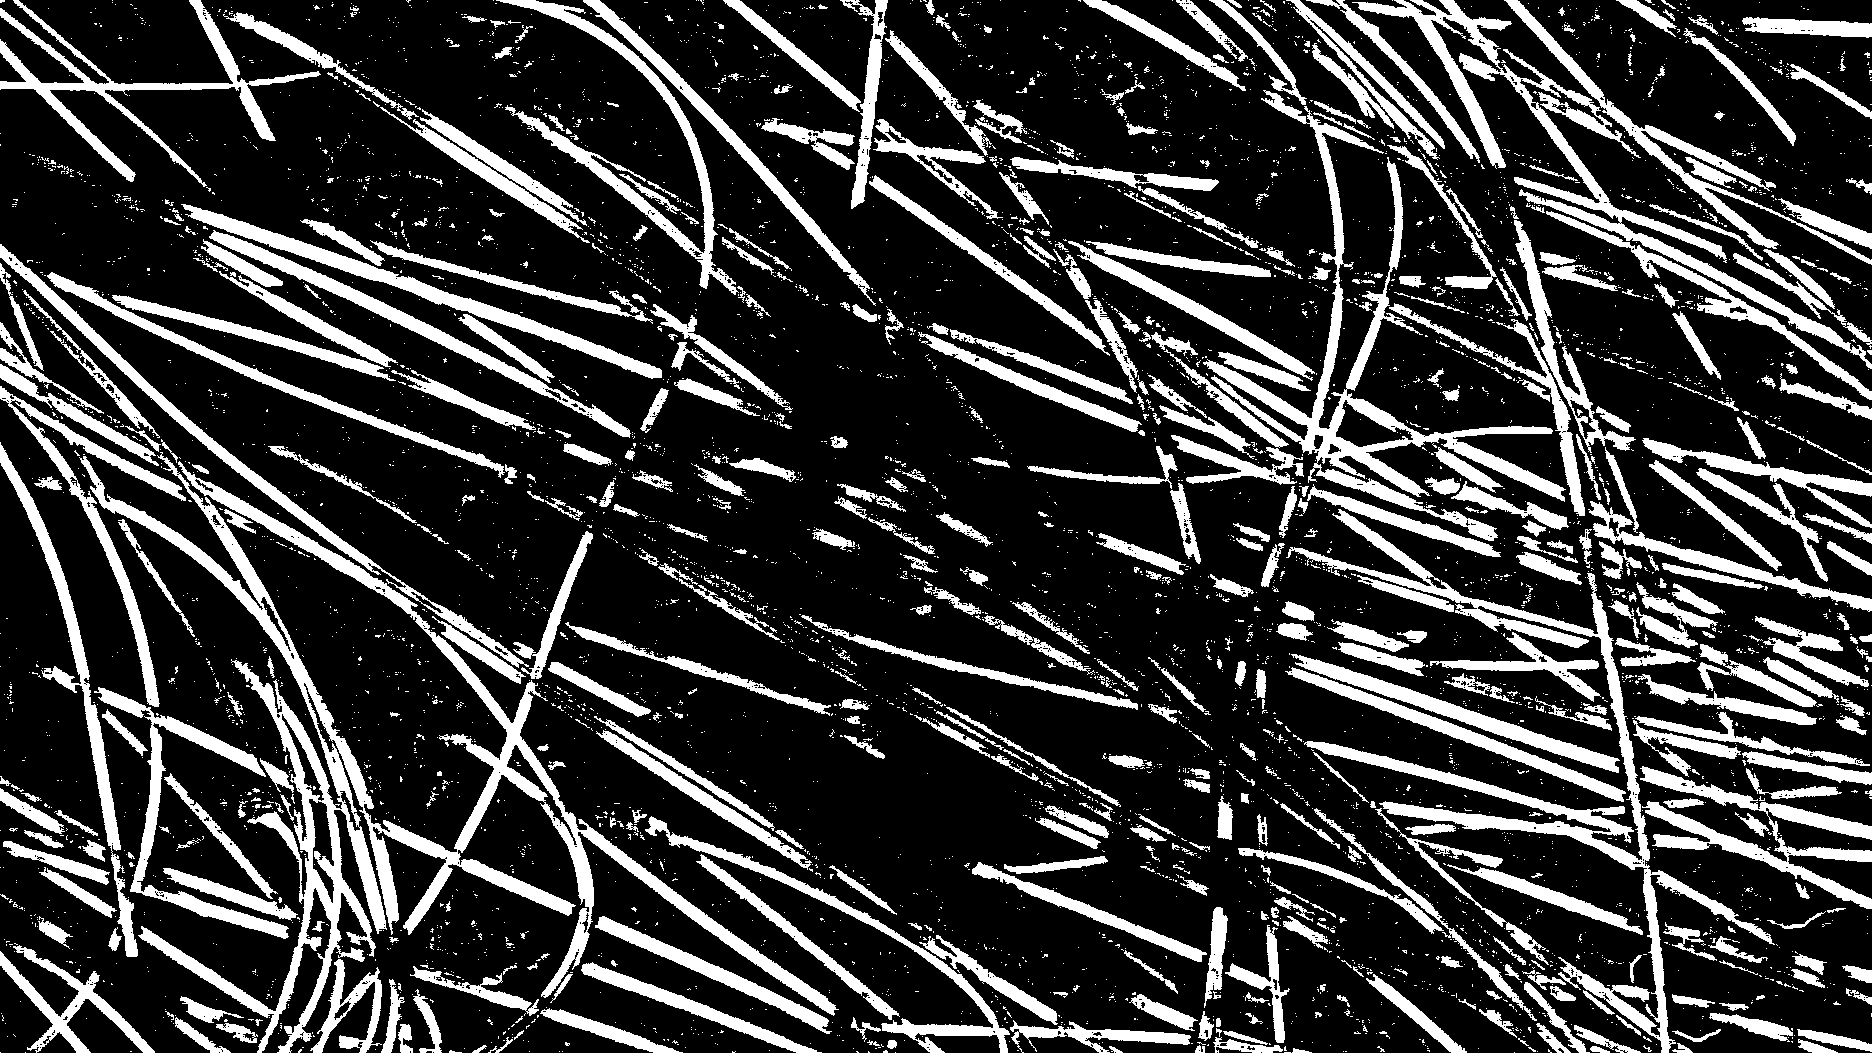

Image after Inpainting


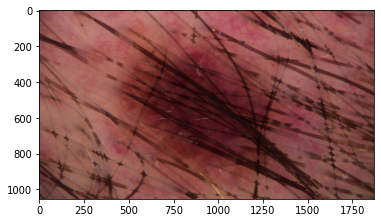

In [21]:
# -*- coding: utf-8 -*-
"""
Following are the DHR tasks followed in this example code:
    
    -- Applying Morphological Black-Hat transformation
    -- Creating the mask for InPainting task
    -- Applying inpainting algorithm on the image
"""
# define location of dataset
folder = '/content/gdrive/My Drive/ISIC-melanoma/train/'
new_storage_folder = '/content/gdrive/My Drive/hair-removal-image/'

start_num = 68279
end_num = 68280

file_startname = 'ISIC_00'

if start_num >= 100000:
  file_startname = 'ISIC_0'
elif start_num >= 1000000:
  file_startname = 'ISIC_'

for i in range (start_num, end_num):
  if os.path.isfile(folder + file_startname + str(i) + '.dcm'):
    filename = folder + file_startname + str(i) + '.dcm'

    image_bytes = tf.io.read_file(filename)

    image = tfio.image.decode_dicom_image(image_bytes, dtype=tf.uint16)

    skipped = tfio.image.decode_dicom_image(image_bytes, on_error='skip', dtype=tf.uint8)

    print("original image")
    plt.imshow(np.squeeze(image.numpy()))
    # plt.set_title('original image')
    plt.show()

    src = np.squeeze(image.numpy())

    print(src.shape)

    # Convert the original image to grayscale
    grayScale = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY )
    print("GrayScaled Image")
    cv2_imshow(grayScale)
    cv2.imwrite(file_startname + str(i) + 'grayScale.jpg', grayScale, [int(cv2.IMWRITE_JPEG_QUALITY), 90])

    # Kernel for the morphological filtering
    kernel = cv2.getStructuringElement(1,(17,17))

    # Perform the blackHat filtering on the grayscale image to find the 
    # hair countours
    blackhat = cv2.morphologyEx(grayScale, cv2.MORPH_BLACKHAT, kernel)
    print("BlackHat filtering result")
    cv2_imshow(blackhat)
    cv2.imwrite(file_startname + str(i) + 'blackhat.jpg', blackhat, [int(cv2.IMWRITE_JPEG_QUALITY), 90])

    # intensify the hair countours in preparation for the inpainting 
    # algorithm
    ret,thresh2 = cv2.threshold(blackhat,10,255,cv2.THRESH_BINARY)
    print("Thresholded image for inpainting")
    cv2_imshow(thresh2)
    cv2.imwrite(file_startname + str(i) + 'thresholded.jpg', thresh2, [int(cv2.IMWRITE_JPEG_QUALITY), 90])


    
    # inpaint the original image depending on the mask
    print("Image after Inpainting")
    dst = cv2.inpaint(src.astype('uint8') , thresh2.astype('uint8'), 1,cv2.INPAINT_TELEA)
    plt.imshow(dst.astype('uint16'))
    plt.show()
    cv2.imwrite(new_storage_folder + file_startname + str(i) + 'Inpainted.jpg', dst, [int(cv2.IMWRITE_JPEG_QUALITY), 90])

Text(0.5, 1.0, 'hair removal image')

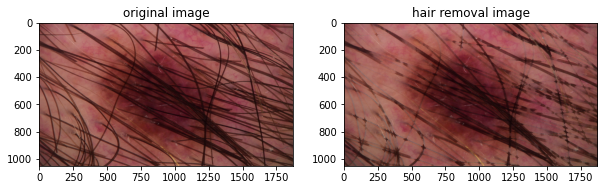

In [23]:
fig, axes = plt.subplots(1,2, figsize=(10,10))
axes[0].imshow(src)
axes[0].set_title('original image')
axes[1].imshow(dst)
axes[1].set_title('hair removal image')

original image


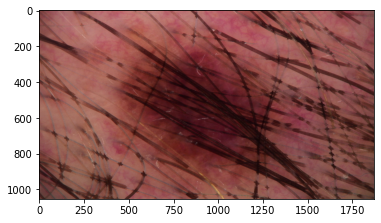

(1053, 1872, 3)
GrayScaled Image


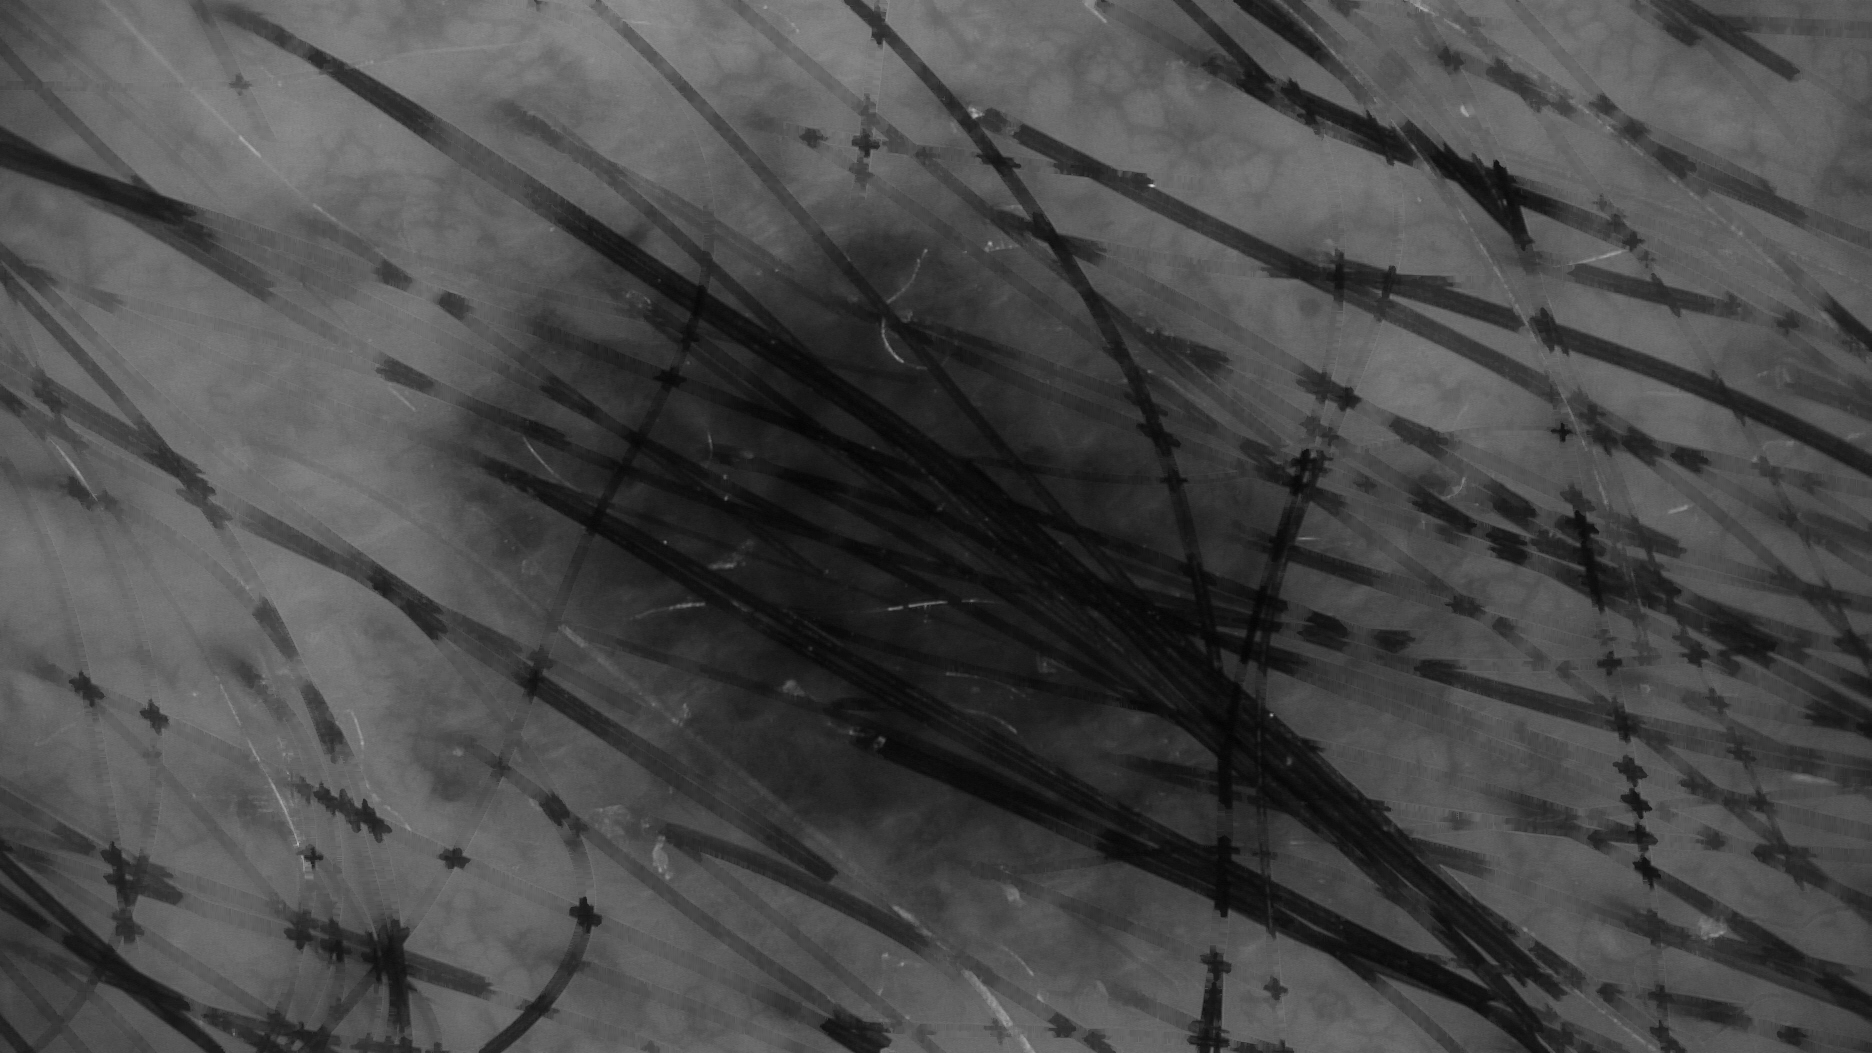

BlackHat filtering result


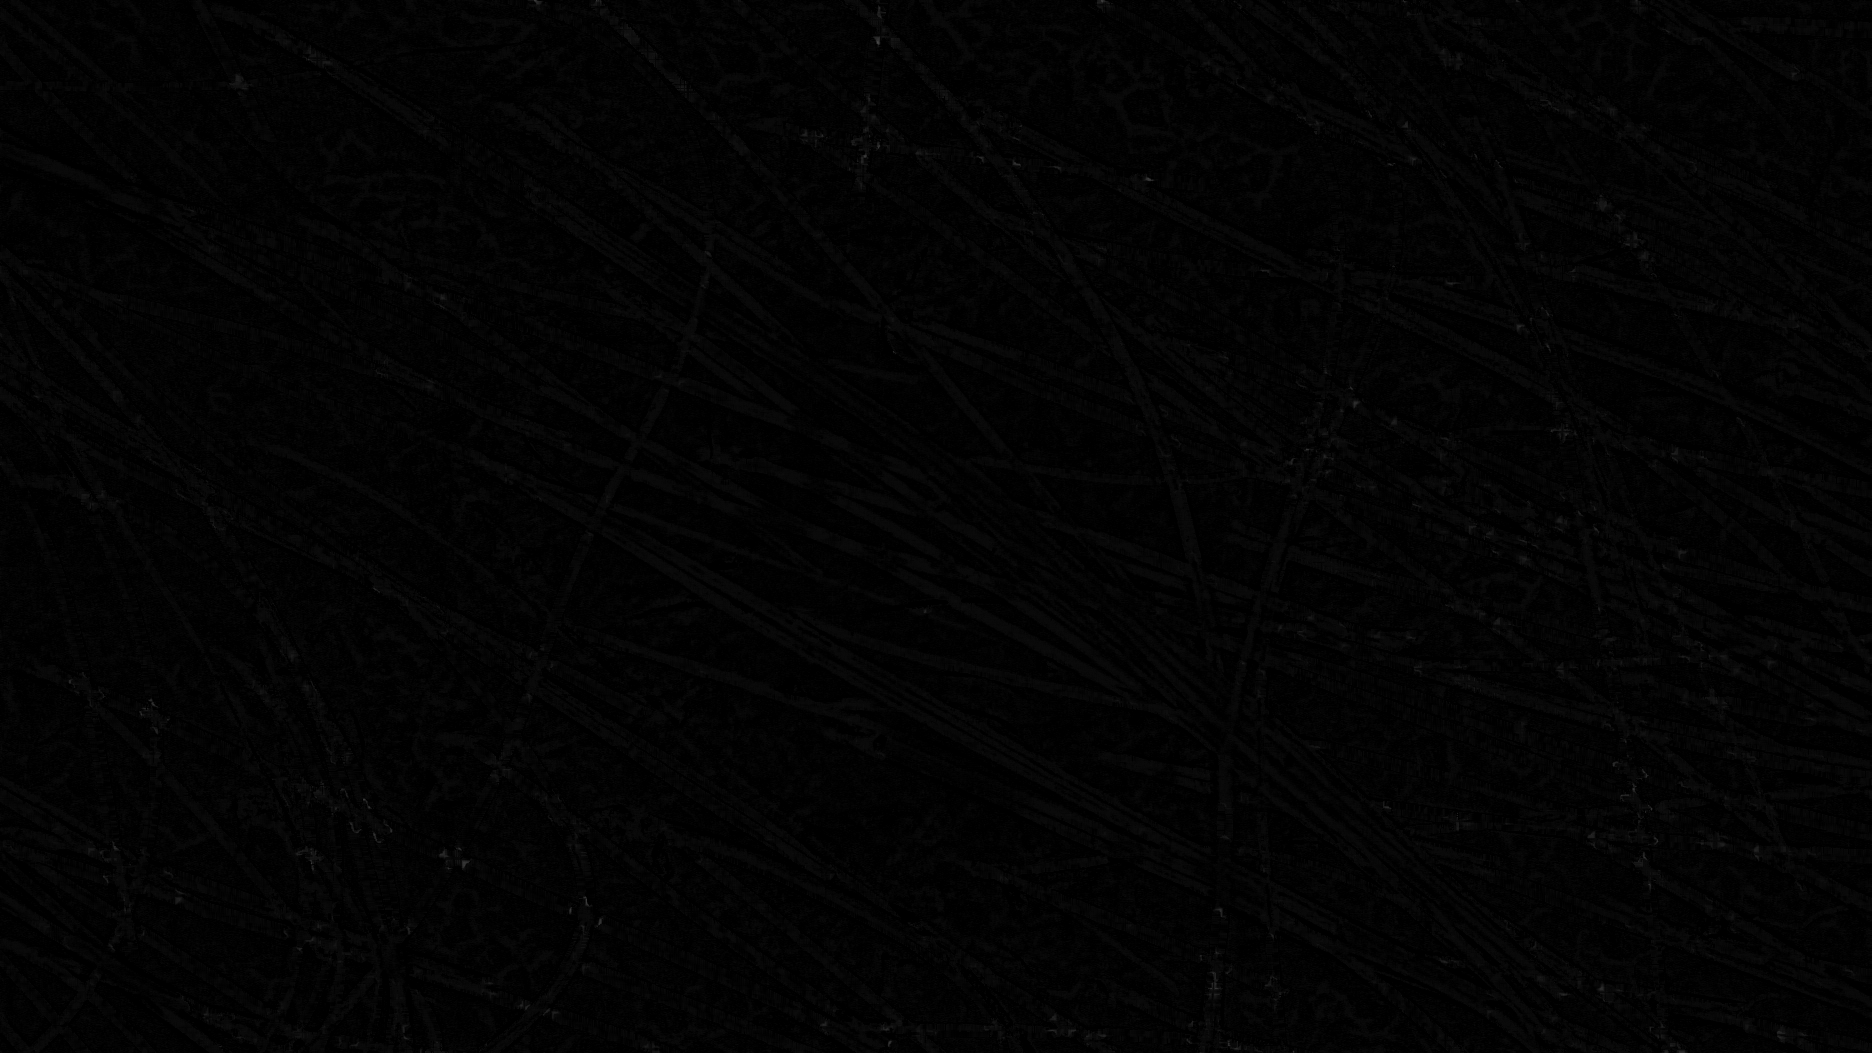

Thresholded image for inpainting


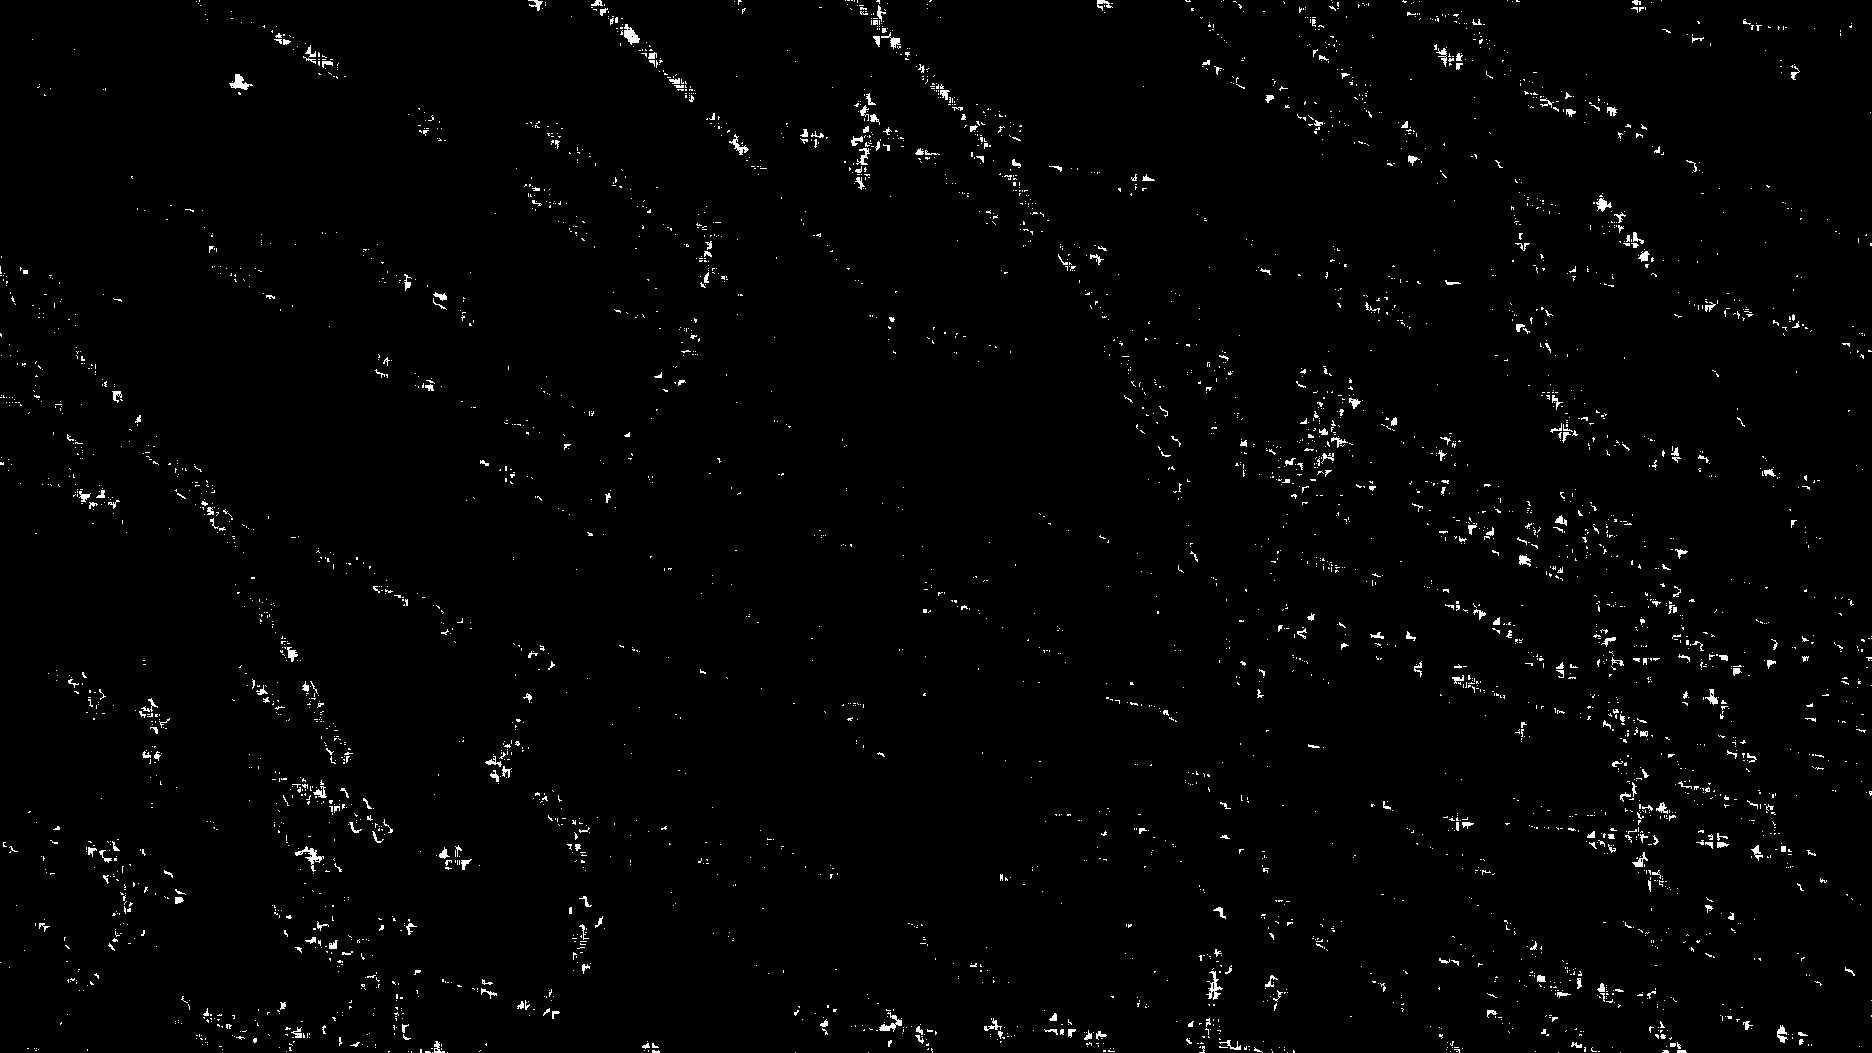

Image after Inpainting


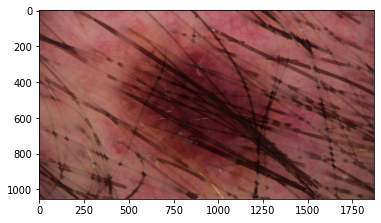

True

In [28]:
print("original image")
plt.imshow(dst)
# plt.set_title('original image')
plt.show()

src = dst

print(src.shape)

# Convert the original image to grayscale
grayScale = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY )
print("GrayScaled Image")
cv2_imshow(grayScale)
cv2.imwrite(file_startname + str(i) + 'grayScale.jpg', grayScale, [int(cv2.IMWRITE_JPEG_QUALITY), 90])

# Kernel for the morphological filtering
kernel = cv2.getStructuringElement(1,(17,17))

# Perform the blackHat filtering on the grayscale image to find the 
# hair countours
blackhat = cv2.morphologyEx(grayScale, cv2.MORPH_BLACKHAT, kernel)
print("BlackHat filtering result")
cv2_imshow(blackhat)
cv2.imwrite(file_startname + str(i) + 'blackhat.jpg', blackhat, [int(cv2.IMWRITE_JPEG_QUALITY), 90])

# intensify the hair countours in preparation for the inpainting 
# algorithm
ret,thresh2 = cv2.threshold(blackhat,10,255,cv2.THRESH_BINARY)
print("Thresholded image for inpainting")
cv2_imshow(thresh2)
cv2.imwrite(file_startname + str(i) + 'thresholded.jpg', thresh2, [int(cv2.IMWRITE_JPEG_QUALITY), 90])


    
# inpaint the original image depending on the mask
print("Image after Inpainting")
dst = cv2.inpaint(src.astype('uint8') , thresh2.astype('uint8'), 1,cv2.INPAINT_TELEA)
plt.imshow(dst.astype('uint16'))
plt.show()
cv2.imwrite(new_storage_folder + file_startname + str(i) + 'Inpainted.jpg', dst, [int(cv2.IMWRITE_JPEG_QUALITY), 90])

Text(0.5, 1.0, 'hair removal image')

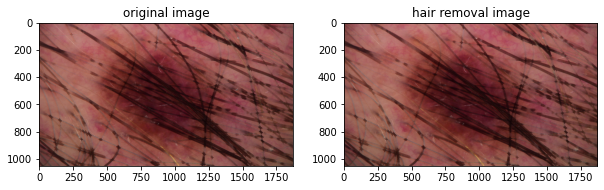

In [29]:
fig, axes = plt.subplots(1,2, figsize=(10,10))
axes[0].imshow(src)
axes[0].set_title('original image')
axes[1].imshow(dst)
axes[1].set_title('hair removal image')